In [193]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as plt

In [201]:
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 100)

In [155]:
df = pd.read_csv("./Stromerzeuger_east_data.csv", delimiter = ';')

In [202]:
df

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,Ort,Straße,Hausnummer,Gemarkung,Flurstück,Gemeindeschlüssel,Koordinate: Breitengrad (WGS84),Koordinate: Längengrad (WGS84),Anzahl der Solar-Module,Hauptausrichtung der Solar-Module,Lage der Einheit,Letzte Aktualisierung,Datum der endgültigen Stilllegung,Datum der geplanten Inbetriebnahme,Name des Anlagenbetreibers (nur Org.),\tMaStR-Nr. des Anlagenbetreibers,Volleinspeisung oder Teileinspeisung,MaStR-Nr. der Genehmigung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),geometry
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,2875,273,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,NaN,NaN,14522360,50986,12956,1250.0,Süd,Freifläche,5/28/2019,NaN,NaN,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,2875,NaN,POINT (12956.00000 50986.00000)
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,9894,875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,Salzatal,Am Schauchenberg,3,NaN,NaN,15088319,51486613,11802551,4608.0,Süd-West,Freifläche,5/9/2022,NaN,NaN,Auer Solar,ABR973713974770,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,9894,NaN,POINT (11802551.00000 51486613.00000)
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,74706,74706,1/31/2019,2/1/2019,Sachsen-Anhalt,39444,Hecklingen,Staßfurter Straße,4,NaN,NaN,15089175,51852,11544,2436.0,Süd,Freifläche,4/21/2020,NaN,NaN,Pro Solar Infrastrukturgesellschaft mbH,ABR928650895732,Volleinspeisung,NaN,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,74706,NaN,POINT (11544.00000 51852.00000)
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,2875,262,12/29/2010,2/1/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,NaN,NaN,14522360,50986,12956,1250.0,Süd,Freifläche,5/28/2019,NaN,NaN,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,2875,NaN,POINT (12956.00000 50986.00000)
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,228354,2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,Elsteraue,Dr.-Pier-Straße,NaN,NaN,NaN,15084130,51068775,12205957,9996.0,Süd,Freifläche,1/27/2022,NaN,NaN,Solarpark Elsteraue GmbH & Co. KG,ABR948985124215,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,228354,NaN,POINT (12205957.00000 51068775.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,03,03,11/13/2022,11/13/2022,Sachsen,2708,Niedercunnersdorf,NaN,NaN,NaN,NaN,14626245,NaN,NaN,1.0,Süd,Freifläche,11/13/2022,NaN,NaN,natürliche Person (ABR938944554306),ABR938944554306,Teileinspeisung (einschließlich Eigenverbrauch),NaN,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,03

In [157]:
df['Betriebs-Status'].unique() #'In operation', 'In planning', 'Finally decommissioned','Temporarily suspended'

array(['In Betrieb', 'In Planung', 'Endgültig stillgelegt',
       'Vorübergehend stillgelegt'], dtype=object)

In [158]:
df.dropna(axis=1, how='all', inplace = True) #removing columns where everything is NA

In [159]:
df= df[df['Betriebs-Status']=='In Betrieb'] #selecting only operational PV

In [160]:
df.isnull().sum()

MaStR-Nr. der Einheit                        0
Anzeige-Name der Einheit                     0
Betriebs-Status                              0
Energieträger                                0
Bruttoleistung der Einheit                   0
Nettonennleistung der Einheit                0
Inbetriebnahmedatum der Einheit              0
Registrierungsdatum der Einheit              0
Bundesland                                   0
Postleitzahl                                 0
Ort                                          0
Straße                                    1156
Hausnummer                                1427
Gemarkung                                 2129
Flurstück                                 2116
Gemeindeschlüssel                            0
Koordinate: Breitengrad (WGS84)            465
Koordinate: Längengrad (WGS84)             465
Anzahl der Solar-Module                     23
Hauptausrichtung der Solar-Module           36
Lage der Einheit                             0
Letzte Aktual

In [161]:
#dropping complete NA columns
df.drop(labels = ['Datum der endgültigen Stilllegung','Datum der geplanten Inbetriebnahme'], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung)
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5",NaN
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4",NaN
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06",NaN
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5",NaN
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,...,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3",NaN
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL973794615104,EEG996692832244,NaN,11/14/2022,"0,6",NaN
2875,SEE952055081995,PV Anlage Garten,In Betrieb,Solare Strahlungsenergie,"3,465","3,465",11/15/2022,11/17/2022,Brandenburg,3099,...,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL969007424878,EEG901635864688,E41081010000000000000000000453919,11/15/2022,"3,465",NaN
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56","SOL21-1/240,"


In [162]:
#dropping columns with >2000 NA vals
df.drop(labels = ["Gemarkung","Flurstück","MaStR-Nr. der Genehmigung" , "Zuschlagnummer (EEG/KWK-Ausschreibung)"], axis =1 )

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,Volleinspeisung oder Teileinspeisung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,"287,5",273,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,"287,5"
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,"989,4",875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,"989,4"
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,"747,06","747,06",1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,Volleinspeisung,Avacon Netz GmbH (SNB990362338043),SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,"747,06"
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,"287,5",262,12/29/2010,2/1/2019,Sachsen,9648,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,"287,5"
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,"2283,54",2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,Volleinspeisung,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,"2283,54"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,"0,3","0,3",11/13/2022,11/13/2022,Sachsen,2708,...,Teileinspeisung (einschließlich Eigenverbrauch),SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,"0,3"
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,"0,6","0,6",11/14/2022,11/14/2022,Sachsen,4827,...,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL973794615104,EEG996692832244,NaN,11/14/2022,"0,6"
2875,SEE952055081995,PV Anlage Garten,In Betrieb,Solare Strahlungsenergie,"3,465","3,465",11/15/2022,11/17/2022,Brandenburg,3099,...,Teileinspeisung (einschließlich Eigenverbrauch),Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL969007424878,EEG901635864688,E41081010000000000000000000453919,11/15/2022,"3,465"
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,"3079,56",2540,11/23/2022,11/23/2022,Sachsen,2633,...,Volleinspeisung,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,"3079,56"


In [163]:
df['Koordinate: Breitengrad (WGS84)']

0          50,986
1       51,486613
2          51,852
3          50,986
4       51,068775
          ...    
2873          NaN
2874          NaN
2875          NaN
2878    51,149438
2880          NaN
Name: Koordinate: Breitengrad (WGS84), Length: 2820, dtype: object

In [164]:
df.replace(',','', regex=True, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [165]:
df['Koordinate: Breitengrad (WGS84)']

0          50986
1       51486613
2          51852
3          50986
4       51068775
          ...   
2873         NaN
2874         NaN
2875         NaN
2878    51149438
2880         NaN
Name: Koordinate: Breitengrad (WGS84), Length: 2820, dtype: object

In [176]:
gdf_pv = gpd. GeoDataFrame (df ,geometry=gpd. points_from_xy (df['Koordinate: Längengrad (WGS84)'], df['Koordinate: Breitengrad (WGS84)']), crs="EPSG:4326")

In [177]:
gdf_pv.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

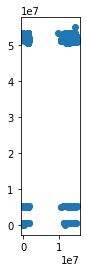

In [181]:
gdf_pv.plot(aspect = 1)

In [46]:
""" 
Alternative dataset
1. level-0 | Country
 2. level-1 | State
 3. level-2 | District
 4. level-3 | Municipality
 5. level-4 | Town
 https://gadm.org/download_country_v3.html
 """

' \nAlternative dataset\n1. level-0 | Country\n 2. level-1 | State\n 3. level-2 | District\n 4. level-3 | Municipality\n 5. level-4 | Town\n https://gadm.org/download_country_v3.html\n '

In [47]:
""" 
#used in this notebook 
1. level-0 | Country
 2. level-1 | State
 3. level-2 | Admistrative regions
 4. level-3 | districts
 https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip"""

' \n#used in this notebook \n1. level-0 | Country\n 2. level-1 | State\n 3. level-2 | Admistrative regions\n 4. level-3 | districts\n https://data.biogeo.ucdavis.edu/data/diva/adm/DEU_adm.zip'

In [113]:
germany = gpd.read_file("./DEU_adm/DEU_adm1.shp")

In [169]:
germany.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

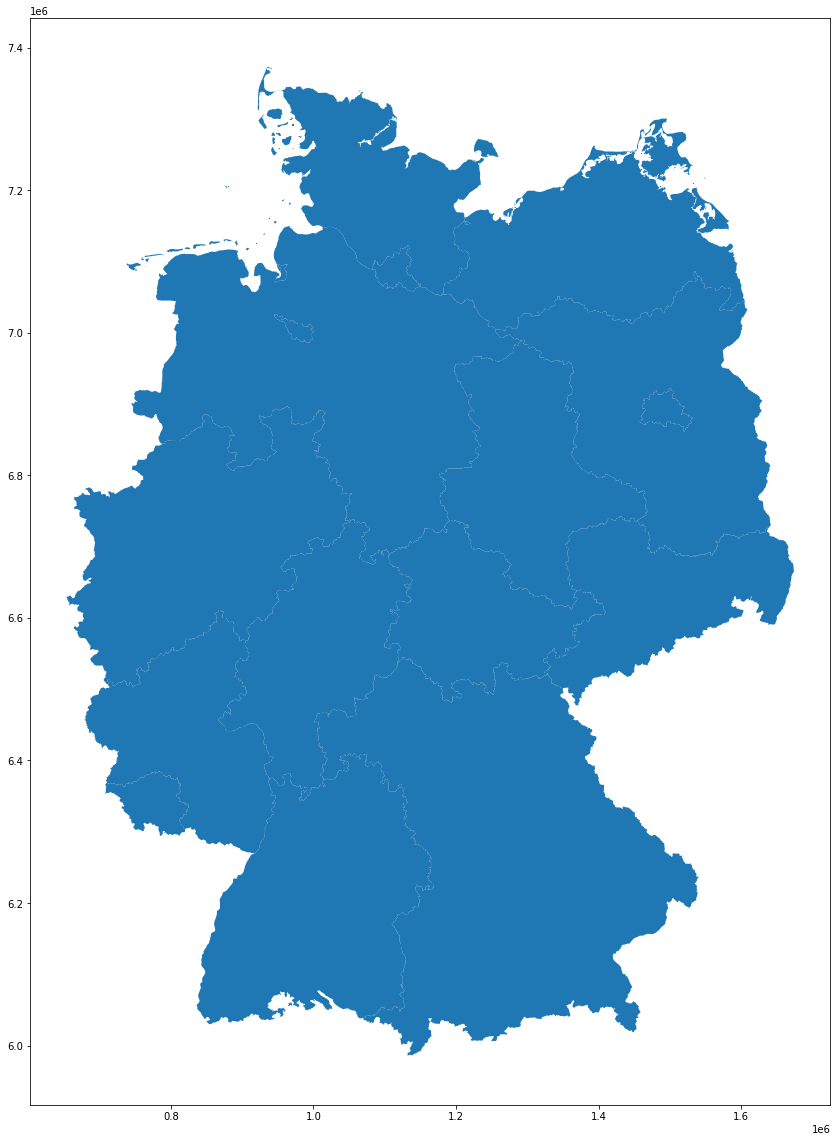

In [119]:
germany.plot(figsize = (20,20))

In [68]:
east_germany = ['Berlin','Brandenburg','Sachsen','Sachsen-Anhalt']

In [69]:
east_ger = germany.loc[germany['NAME_1'].isin(east_germany)]

In [110]:
east_ger

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
2,86,DEU,Germany,3,Berlin,Land,State,None,None,"POLYGON ((1466955.985 6871010.323, 1465604.430..."
3,86,DEU,Germany,4,Brandenburg,Land,State,None,None,"POLYGON ((1545059.765 7076225.174, 1545033.649..."
12,86,DEU,Germany,13,Sachsen-Anhalt,Land,State,None,Saxony-Anhalt,"POLYGON ((1294924.898 6986034.056, 1294911.734..."
13,86,DEU,Germany,14,Sachsen,Land,State,None,Saxony,"POLYGON ((1433572.325 6741160.216, 1432887.471..."


In [71]:
#colors for individual states
state_colors = {'Berlin': 'lightcoral', 'Brandenburg': 'lightblue', 'Sachsen-Anhalt' : 'khaki','Sachsen' : 'plum'}
cmap = plt.colors.ListedColormap([state_colors[b] for b in east_ger.NAME_1.unique()])


<AxesSubplot:>

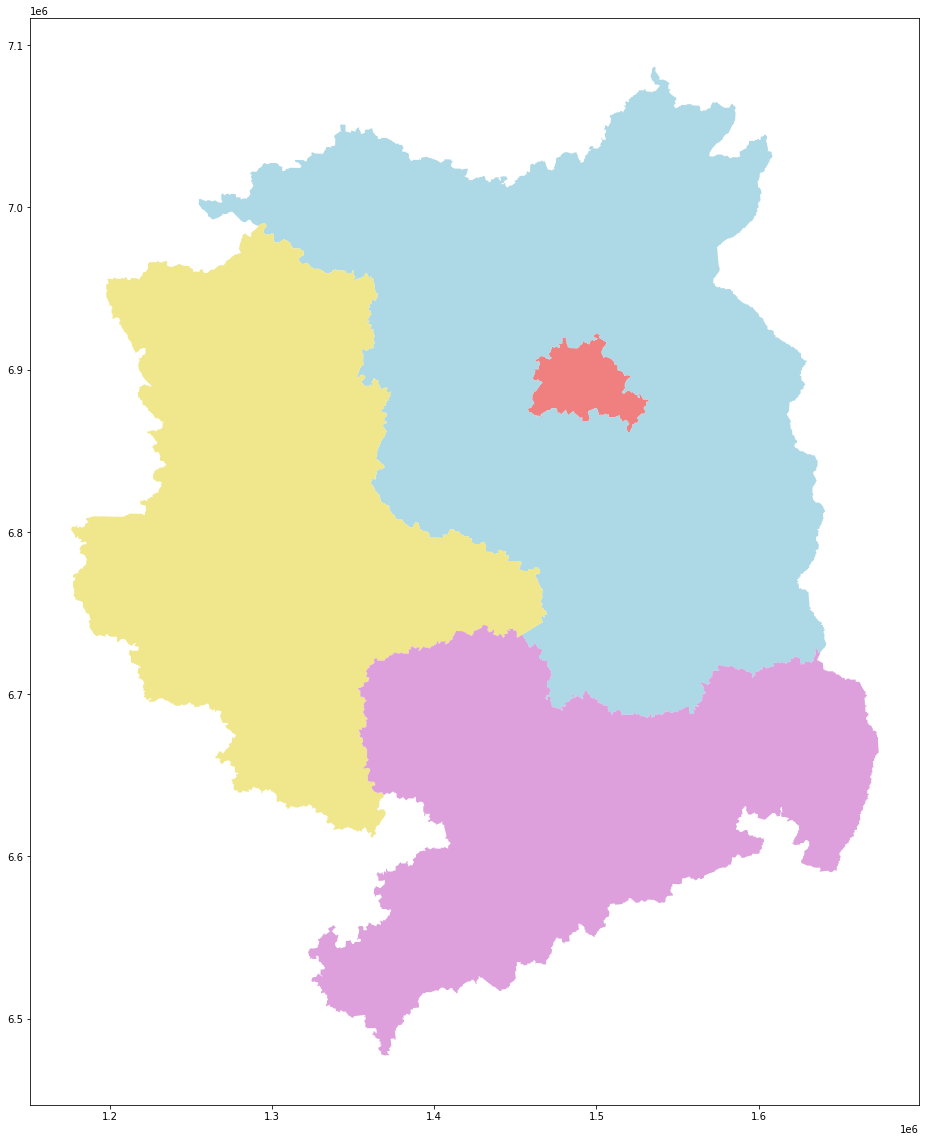

In [82]:
base

<AxesSubplot:>

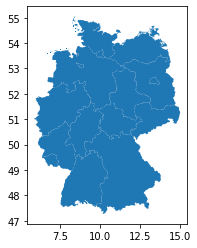

In [116]:
base = germany.plot()
base

In [183]:
germany= germany.to_crs(epsg= 4326)
east_ger= east_ger.to_crs(germany.crs)
gdf_pv= gdf_pv.to_crs(germany.crs)
gdf_pv

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),geometry
0,SEE947307492223,solar400 1,In Betrieb,Solare Strahlungsenergie,2875,273,12/29/2010,2/1/2019,Sachsen,9648,...,SNB916269213931,Geprüft,Mittelspannung,SEL933499539853,EEG906843602237,E41081010000000000000000000140851,12/29/2010,2875,NaN,POINT (12956.00000 50986.00000)
1,SEE982140864486,AuerSolarI/I,In Betrieb,Solare Strahlungsenergie,9894,875,12/11/2010,2/3/2019,Sachsen-Anhalt,6198,...,SNB916269213931,In Prüfung,Mittelspannung,SEL945203720655,EEG966469267302,E41081010000000000000000000158799,12/11/2010,9894,NaN,POINT (11802551.00000 51486613.00000)
2,SEE900237780105,39444 Hecklingen,In Betrieb,Solare Strahlungsenergie,74706,74706,1/31/2019,2/1/2019,Sachsen-Anhalt,39444,...,SNB990362338043,Geprüft,Mittelspannung,SEL930855180247,EEG905480216517,NaN,1/31/2019,74706,NaN,POINT (11544.00000 51852.00000)
3,SEE994799308280,solar400 2,In Betrieb,Solare Strahlungsenergie,2875,262,12/29/2010,2/1/2019,Sachsen,9648,...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG925673608240,E41081010000000000000000000165516,12/29/2010,2875,NaN,POINT (12956.00000 50986.00000)
4,SEE994872405684,SP Elsteraue Basis,In Betrieb,Solare Strahlungsenergie,228354,2023,5/19/2011,2/1/2019,Sachsen-Anhalt,6729,...,SNB916269213931,Geprüft,Mittelspannung,SEL938641335314,EEG962965671544,E41081010000000000000000000159269,5/19/2011,228354,NaN,POINT (12205957.00000 51068775.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,SEE971439180857,Solar_NC,In Betrieb,Solare Strahlungsenergie,03,03,11/13/2022,11/13/2022,Sachsen,2708,...,SNB968914838013,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL984625795421,EEG990948049714,NaN,11/13/2022,03,NaN,POINT EMPTY
2874,SEE944979911410,Balkonkraftwerk,In Betrieb,Solare Strahlungsenergie,06,06,11/14/2022,11/14/2022,Sachsen,4827,...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL973794615104,EEG996692832244,NaN,11/14/2022,06,NaN,POINT EMPTY
2875,SEE952055081995,PV Anlage Garten,In Betrieb,Solare Strahlungsenergie,3465,3465,11/15/2022,11/17/2022,Brandenburg,3099,...,SNB916269213931,In Prüfung,Niederspannung (= Hausanschluss/Haushaltsstrom),SEL969007424878,EEG901635864688,E41081010000000000000000000453919,11/15/2022,3465,NaN,POINT EMPTY
2878,SEE931020303058,Solarpark Göda-Gaußig - P20-023 - Teil 4,In Betrieb,Solare Strahlungsenergie,307956,2540,11/23/2022,11/23/2022,Sachsen,2633,...,SNB968914838013,In Prüfung,Umspannebene Hochspannung/Mittelspannung,SEL912593382787,EEG908020485459,NaN,11/23/2022,307956,SOL21-1/240,POINT (14317739.00000 51149438.00000)


In [184]:
gdf_pv.plot()


ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>

<AxesSubplot:>

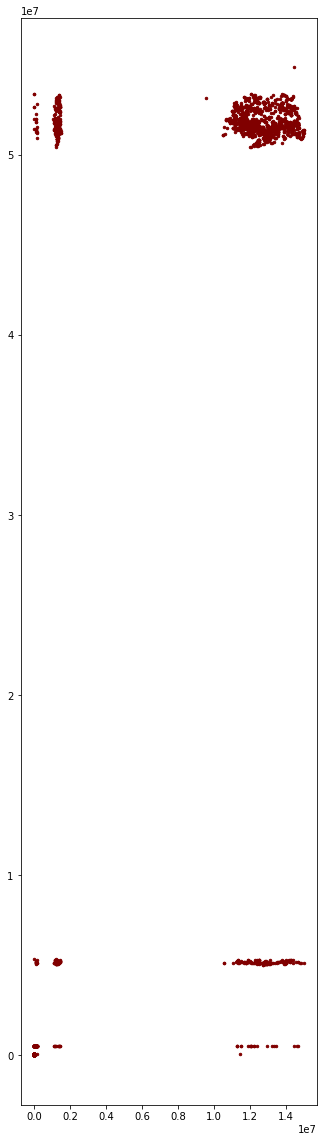

In [187]:
#base = east_ger.plot(cmap=cmap, figsize = (20,20))
base = germany.plot(figsize = (20,20))
gdf_pv.plot(ax=base,marker = 'o', color = 'maroon', markersize = 6, aspect =1, figsize = (20,20))


In [56]:
len(df['Ort'].unique())

641

In [57]:
df.columns

Index(['MaStR-Nr. der Einheit', 'Anzeige-Name der Einheit', 'Betriebs-Status',
       'Energieträger', 'Bruttoleistung der Einheit',
       'Nettonennleistung der Einheit', 'Inbetriebnahmedatum der Einheit',
       'Registrierungsdatum der Einheit', 'Bundesland', 'Postleitzahl', 'Ort',
       'Straße', 'Hausnummer', 'Gemarkung', 'Flurstück', 'Gemeindeschlüssel',
       'Koordinate: Breitengrad (WGS84)', 'Koordinate: Längengrad (WGS84)',
       'Anzahl der Solar-Module', 'Hauptausrichtung der Solar-Module',
       'Lage der Einheit', 'Letzte Aktualisierung',
       'Datum der endgültigen Stilllegung',
       'Datum der geplanten Inbetriebnahme',
       'Name des Anlagenbetreibers (nur Org.)',
       '\tMaStR-Nr. des Anlagenbetreibers',
       'Volleinspeisung oder Teileinspeisung', 'MaStR-Nr. der Genehmigung',
       'Name des Anschluss-Netzbetreibers',
       'MaStR-Nr. des Anschluss-Netzbetreibers', 'Netzbetreiberprüfung',
       'Spannungsebene', 'MaStR-Nr. der Lokation', 'MaStR-Nr. 

In [218]:
x

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,Ort,Straße,Hausnummer,Gemarkung,Flurstück,Gemeindeschlüssel,Koordinate: Breitengrad (WGS84),Koordinate: Längengrad (WGS84),Anzahl der Solar-Module,Hauptausrichtung der Solar-Module,Lage der Einheit,Letzte Aktualisierung,Datum der endgültigen Stilllegung,Datum der geplanten Inbetriebnahme,Name des Anlagenbetreibers (nur Org.),\tMaStR-Nr. des Anlagenbetreibers,Volleinspeisung oder Teileinspeisung,MaStR-Nr. der Genehmigung,Name des Anschluss-Netzbetreibers,MaStR-Nr. des Anschluss-Netzbetreibers,Netzbetreiberprüfung,Spannungsebene,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),geometry
21,SEE962677893340,solar400 3,In Betrieb,Solare Strahlungsenergie,2875,262,12/29/2010,2/5/2019,Sachsen,9648,Mittweida,Altenburger Straße,18 a,NaN,NaN,14522360,50986,12956,1238.0,Süd,Freifläche,5/28/2019,NaN,NaN,solar400 GmbH & Co. KG,ABR922891810752,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL918111377983,EEG988397797638,E41081010000000000000000000165521,12/29/2010,28754,NaN,POINT (12956.00000 50986.00000)
83,SEE958790458429,Angersdorf 1.3.A,In Betrieb,Solare Strahlungsenergie,4685905,4020,2/13/2019,2/20/2019,Sachsen-Anhalt,6179,Teutschenthal,NaN,NaN,Angersdorf,Flur3: 26/31 26/33 26/38 26/39 26/41 26/46,15087386,51456993,11883024,16353.0,Süd,Freifläche,7/19/2019,NaN,NaN,ENERPARC Solar Invest 107 GmbH,ABR930935428818,Volleinspeisung,NaN,Energieversorgung Halle Netz GmbH (SNB98293461...,SNB982934611074,Geprüft,Mittelspannung,SEL908049627847,EEG975489722388,NaN,2/13/2019,4686,SOL17-1/089,POINT (11883024.00000 51456993.00000)
382,SEE946837735602,PV-Wollin,In Betrieb,Solare Strahlungsenergie,73697,6333,5/28/2019,6/3/2019,Brandenburg,14778,Wollin,Wenzlower Str.,bei 10,NaN,NaN,12069232,52286207,12466044,2862.0,Süd,Freifläche,9/6/2021,NaN,NaN,Dr. Ing. E. h. Frank Asbeck Ingenieurbüro für ...,ABR958583450753,Volleinspeisung,NaN,E.DIS Netz GmbH (SNB941690671609),SNB941690671609,Geprüft,Mittelspannung,SEL965906673447,EEG957129260085,NaN,5/28/2019,73699,NaN,POINT (12466044.00000 52286207.00000)
434,SEE928837296246,Beuna,In Betrieb,Solare Strahlungsenergie,433596,4041,12/14/2011,6/7/2019,Sachsen-Anhalt,6217,Beuna,Naumburger Straße (Beuna),NaN,NaN,NaN,15088220,5131,1196,18852.0,Süd,Freifläche,6/19/2019,NaN,NaN,SOLSA Solarenergie Sachsen-Anhalt GmbH,ABR957858324102,Volleinspeisung,NaN,Stadtwerke Merseburg GmbH (SNB913006238462),SNB913006238462,Geprüft,Mittelspannung,SEL959754267668,EEG912258713222,E40999010000100140000000S01600001,12/14/2011,4336,NaN,POINT (1196.00000 5131.00000)
512,SEE952525269793,Farnstädt NF,In Betrieb,Solare Strahlungsenergie,27,27,9/19/2006,6/29/2019,Sachsen-Anhalt,6279,Farnstädt,NaN,NaN,NaN,NaN,15088100,NaN,NaN,150.0,Süd,Freifläche,3/15/2022,NaN,NaN,natürliche Person (ABR943965046433),ABR943965046433,Volleinspeisung,NaN,Mitteldeutsche Netzgesellschaft Strom mbH (SNB...,SNB916269213931,Geprüft,Mittelspannung; Mittelspannung; Mittelspannung,SEL959847104016,EEG931220428674,E41081010000000000000000000033165,9/19/2006,30,NaN,POINT EMPTY
778,SEE955748019633,PVA Litten 1,In Betrieb,Solare Strahlungsenergie,194334,15560,9/30/2012,10/5/2019,Sachsen,2627,Kubschütz,NaN,NaN,Purschwitz,241/6,14625290,51196779,14523158,79320.0,Süd,Freifläche,3/10/2021,NaN,NaN,ENERPARC Solarpark Litten GmbH,ABR912377203765,Volleinspeisung,NaN,SachsenNetze HS.HD GmbH (SNB968914838013),SNB968914838013,Geprüft,Hochspannung,SEL901071857831,EEG961374388005,E41874010000000000314102122900001,9/30/2012,1945104,NaN,POINT (14523158.00000 51196779.00000)
941,SEE901904374771,PVA Sietzsch 2,In Betrieb,Solare Strahlungsenergie,284181,2381,12/8/2011,12/7

In [217]:
x= gdf_pv[gdf_pv['Bruttoleistung der Einheit'] < gdf_pv['Installierte Leistung']]
x[['Bruttoleistung der Einheit','Nettonennleistung der Einheit','Installierte Leistung']]

,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Installierte Leistung
21,2875,262,28754
83,4685905,4020,4686
382,73697,6333,73699
434,433596,4041,4336
512,27,27,30
778,194334,15560,1945104
941,284181,2381,984618
1155,12,12,16
1249,111746,10080,1117632
1710,19684,1728,32747


In [212]:
gdf_pv['Bruttoleistung der Einheit']

0         2875
1         9894
2        74706
3         2875
4       228354
         ...  
2873        03
2874        06
2875      3465
2878    307956
2880       585
Name: Bruttoleistung der Einheit, Length: 2820, dtype: object

In [211]:
gdf_pv['Installierte Leistung']

0         2875
1         9894
2        74706
3         2875
4       228354
         ...  
2873        03
2874        06
2875      3465
2878    307956
2880       585
Name: Installierte Leistung, Length: 2820, dtype: object

In [210]:
print(len(gdf_pv.Postleitzahl.unique()))
print(len(gdf_pv.Ort.unique()))
print(len(gdf_pv['Name des Anlagenbetreibers (nur Org.)'].unique()))

545
641
1779


In [188]:
total_pv_by_state = df.groupby(['Bundesland'])['Anzahl der Solar-Module'].sum()
total_pv_by_state.sort_values(ascending = False)[:10]

Bundesland
Brandenburg       17259510.0
Sachsen-Anhalt     7838581.0
Sachsen            5545469.0
Berlin               13880.0
Name: Anzahl der Solar-Module, dtype: float64

In [209]:
total_pv_by_ort = df.groupby(['Bundesland', 'Ort'])['Anzahl der Solar-Module'].sum()
total_pv_by_ort

Bundesland      Ort                         
Berlin          Berlin                             7783.0
                Schöneiche                         6096.0
                Woltersdorf                           1.0
Brandenburg     Ahrensfelde                      165741.0
                Altdöbern                         49224.0
                Altenau                            3920.0
                Am Mellensee                          3.0
                Angermünde                        35300.0
                Annahütte                          7664.0
                Bad Freienwalde                    1196.0
                Bad Wilsnack                       2268.0
                Bantikow                          28124.0
                Baruth                             9110.0
                Beeskow                           28414.0
                Berkenbrück                        4544.0
                Bersteland                         2004.0
                Biesenthal 

In [208]:
total_pv_by_pz = df.groupby(['Bundesland', 'Postleitzahl'])['Anzahl der Solar-Module'].sum()
total_pv_by_pz

Bundesland      Postleitzahl
Berlin          12051                 2.0
                12105              7638.0
                12107               120.0
                12109                 2.0
                12349                 2.0
                12357                 2.0
                12621                 0.0
                12623                 4.0
                13055                 4.0
                13059                 1.0
                13127                 0.0
                13349                 2.0
                13503                 2.0
                13581                 2.0
                14055                 2.0
                15566              6096.0
                15569                 1.0
Brandenburg     1945              35360.0
                1968             819912.0
                1979              57612.0
                1983              86911.0
                1987             131163.0
                1990                 22.0
     

In [207]:
total_pv_by_direction = df.groupby(['Bundesland','Hauptausrichtung der Solar-Module'])['Anzahl der Solar-Module'].sum()
total_pv_by_direction

Bundesland      Hauptausrichtung der Solar-Module
Berlin          Nord-West                                   4.0
                Süd                                     13874.0
                Süd-West                                    2.0
Brandenburg     Nord                                    22389.0
                Ost                                      7564.0
                Ost-West                                95117.0
                Süd                                  16418497.0
                Süd-Ost                                441104.0
                Süd-West                               232197.0
                nachgeführt                             11757.0
Sachsen         Nord                                    10373.0
                Nord-West                                2174.0
                Ost                                     12284.0
                Ost-West                                34303.0
                Süd                                   